In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pymc3 as pm
from ipywidgets import interact
import arviz as az
# %matplotlib inline
sns.set()

In [2]:
def ECDF(data):
    x = np.sort(data)
    y = np.cumsum(x) / np.sum(x)
    
    return x, y

## Normal distribution

(array([ 1.,  6.,  5.,  9., 19., 24., 17.,  8.,  8.,  3.]),
 array([ 74.76087646,  79.49436411,  84.22785177,  88.96133942,
         93.69482708,  98.42831474, 103.16180239, 107.89529005,
        112.62877771, 117.36226536, 122.09575302]),
 <a list of 10 Patch objects>)

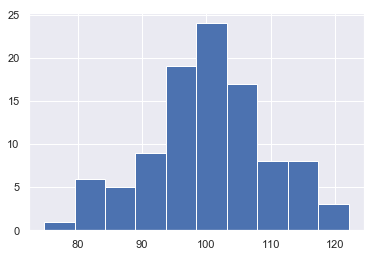

In [3]:
N=100
x = np.random.normal(100, 10, N)+ np.random.normal(0, 1, N)
plt.hist(x)

In [35]:
with pm.Model() as mod:
    # Prior for mean & standard deviation
    μ_1 = pm.Normal('μ_1', mu= 10, sd = 5)
    σ_1 = pm.Uniform('σ_1', 0, 10)
    # Gaussian Likelihood
    y_1 = pm.Normal('y_1', mu = μ_1, sd = σ_1, observed = x)

    trace = pm.sample(2000, njobs= 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ_1, μ_1]
100%|████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 463.11it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8870182012362509, but should be close to 0.8. Try to increase the number of tuning steps.


In [5]:

map_estimate = pm.find_MAP(model=mod)

map_estimate

C:\Users\ciort\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -875.76, ||grad|| = 26.912: 100%|████████████████████████████████████████████| 14/14 [00:00<00:00, 1002.29it/s]


{'μ_1': array(96.88627668),
 'σ_1_interval__': array(30.23908238),
 'σ_1': array(10.)}

In [6]:
e = np.random.normal(map_estimate['μ_1'], map_estimate['σ_1'], 200)

In [13]:
pm.hpd(e, alpha=0.05)

array([ 82.28271117, 120.10339726])

In [34]:
pm.hpd(np.arange(100), alpha=0.05) #https://github.com/pymc-devs/pymc3/blob/master/pymc3/stats.py

array([ 0, 95])

In [ ]:
az.plot_kde(x)

In [ ]:
az.plot_posterior(e)

https://discourse.pymc.io/t/comparing-models-with-waic/321/7

In [36]:
waic = pm.waic(trace, mod)
waic

C:\Users\ciort\Anaconda3\lib\site-packages\pymc3\stats.py:167: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


WAIC_r(WAIC=744.0865168771821, WAIC_se=14.416048416272535, p_WAIC=1.4169418296889007, var_warn=0)

Compare models: https://docs.pymc.io/notebooks/model_comparison.html

In [ ]:
# with mod:
#     samples = pm.sample(2000, njobs= 1)

# az.plot_posterior(samples, varnames = [ 'y_1']);

In [ ]:
??az.plot_posterior

## Skewed distribution

In [ ]:
x =  np.random.gamma(2,2, N) + np.random.normal(0, 1, N)
print(x.shape)
x = np.abs(x)*1000
plt.hist(x)


In [ ]:
with pm.Model() as mod:
    alpha = pm.Uniform('alpha', 0, 10) # == k
    beta  = pm.Uniform('beta' , 0, 10) # == theta
#     y_1 = pm.InverseGamma('y_1', alpha = alpha, beta = beta, observed = x)
    y_1 = pm.Gamma('y_1', alpha = alpha, beta = beta, observed = x)


In [ ]:
# for RV in mod.basic_RVs:
#     print(RV.name, RV.logp(mod.test_point))

In [ ]:
with mod:
    trace = pm.sample(2000, njobs= 1)

In [ ]:
samples = pm.sample_ppc(trace=trace, samples=500, model=mod)

In [ ]:
e = samples['y_1'].flatten() 
plt.hist(e)
az.plot_posterior(e)

In [ ]:
x1, y1 = ECDF(e.flatten() )# Want ECDF of drug-treatment PPC samples
plt.plot(x1, y1, label='ppc')
x2, y2 = ECDF(x)  # Want ECDF of drug-treatment data
plt.plot(x2, y2, label='data')
plt.legend()

In [ ]:
map_estimate = pm.find_MAP(model=mod)
map_estimate

https://docs.pymc.io/notebooks/stochastic_volatility.html

In [ ]:
from pymc3.distributions.timeseries import GaussianRandomWalk
with pm.Model() as mod:
    step_size = pm.Exponential('sigma', 50.)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(x))

    nu = pm.Exponential('nu', .1)

    r = pm.StudentT('r', nu=nu,
                    lam=pm.math.exp(-2*s),
                    observed=x)

In [ ]:
map_estimate = pm.find_MAP(model=mod)
map_estimate

In [ ]:
with mod:
    samples = pm.sample(2000, njobs= 1)

In [ ]:
e = np.exp(samples[s].T)

In [ ]:
plt.hist(e)

In [ ]:
e.shape

In [ ]:
e= np.random.weibull()

1. what is hpc, how does it work?
2. how to score models?

